In [1]:
cd /home

/home


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import json 
import os

import matplotlib.pyplot as plt

from presentation.scripts.classify import build_lstm, build_lstm_att
from core.astromer import get_ASTROMER

os.environ["CUDA_VISIBLE_DEVICES"]='-1'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
new_model = tf.keras.models.load_model('./runs/astromer_256/classifiers/a/alcock/fold_0/alcock_500/mlp_att/model/')

2022-07-16 20:51:09.602370: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-16 20:51:09.602408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: f2d80638b482
2022-07-16 20:51:09.602415: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: f2d80638b482
2022-07-16 20:51:09.602512: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.32.3
2022-07-16 20:51:09.602530: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.32.3
2022-07-16 20:51:09.602535: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.32.3
2022-07-16 20:51:09.602732: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instruct

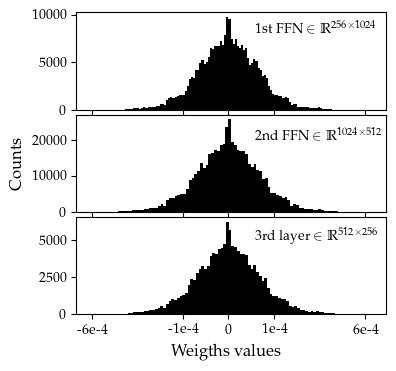

In [45]:
fig, axes = plt.subplots(3,1, figsize=(4,4), dpi=100, sharex=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.3})

cut = [.0005, .1, .01, 100]
for i, ax in enumerate(axes.ravel()):
    kernel, bias = new_model.get_layer('dense_{}'.format(i+5)).weights

    kernel_flatten = np.reshape(kernel, kernel.shape[0]*kernel.shape[1])
    kernel_flatten = kernel_flatten[np.abs(kernel_flatten)<cut[i]]

    ax.hist(kernel_flatten, bins=100, color='k')
    if i == 0:
        values = list(np.linspace(kernel_flatten.min(), kernel_flatten.max(), 4))
        values = values[:2]+[0.]+values[2:]
        ax.set_xticks(values)
        ax.set_xticklabels(['-5e-4', '-1e-4', '0', '1e-4', '5e-4'])
        ax.text(1.3e-4, 8000, s='1st FFN $\in \mathbb{R}^{256 \\times 1024}$')
        
    if i == 1:
        values = list(np.linspace(kernel_flatten.min(), kernel_flatten.max(), 4))
        values = values[:2]+[0.]+values[2:]
        ax.set_xticks(values)
        ax.set_xticklabels(['-6e-4', '-1e-4', '0', '1e-4', '6e-4'])
        ax.text(1.3e-4, 20000, s='2nd FFN $\in \mathbb{R}^{1024 \\times 512}$')
        
    if i == 2:
        values = list(np.linspace(kernel_flatten.min(), kernel_flatten.max(), 4))
        values = values[:2]+[0.]+values[2:]
        ax.set_xticks(values)
        ax.set_xticklabels(['-6e-4', '-1e-4', '0', '1e-4', '6e-4'])
        ax.text(1.3e-4, 5000, s='3rd layer $\in \mathbb{R}^{512 \\times 256}$')
        
fig.text(0.5, 0.02, 'Weigths values', ha='center', fontsize=12)
fig.text(-0.04, 0.5, 'Counts', va='center', rotation='vertical', fontsize=12)
fig.savefig('presentation/figures/mlp_weights.pdf', format='pdf', bbox_inches='tight')